#  <u>*Auto Mobile Analysis .*</u>

## <u>*Analysis objective*</u>
### *To predict predicy the Auto Mobile Prices based on given features inputs*

---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')

## *Importing data*

In [2]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Week_1\DataFiles\automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## *Data shape*

In [3]:
df.shape

(205, 26)

## *Data info*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

---

## *Data Cleaning*

*A. colums names cleaning: (converting all to small letters and add "_" in spaces between words)*

In [5]:
import janitor
df=df.clean_names()

*B. Replaing "?" symbol with nan-value :*

In [6]:
df=df.replace("?",np.nan)

*C. na-values :*

In [7]:
print(f"The total number of na values are {df.isna().sum().sum()}")
print()
print("The number of na-values in each features are :")
df.isna().sum()

The total number of na values are 59

The number of na-values in each features are :


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

*-- We will replce the NA Values wuth randomly selcted values for the same dataset*

In [8]:
from feature_engine.imputation import RandomSampleImputer
rand_imput=RandomSampleImputer(seeding_method="add")
rand_imput.fit(df)
rand_imput.transform(df)
df=rand_imput.transform(df)

*D. converting features into desired Data Type:*

In [9]:
df=df.infer_objects()
df[["normalized_losses","horsepower","peak_rpm","price"]]=df[["normalized_losses","horsepower","peak_rpm","price"]].astype("int64")
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float64")

---

## *Exploratory Data Analysis - EDA*

*A. categorical & numerical_features:*

In [10]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [11]:
print("we have {} numerical features : {}".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 16 numerical features : ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
we have 10 categorical features : ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


*B. Basic data statistics:*

* *Numerical data statistics :*

In [12]:
pd.DataFrame(numerical_features).describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,121.273171,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.332293,3.256341,10.142537,104.273171,5124.390244,25.219512,30.751220,13211.180488
std,1.245307,35.480090,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273992,0.314167,3.972040,39.689030,477.601487,6.542142,6.886443,7905.200194
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


* *Categorical data statistics :*

In [13]:
pd.DataFrame(categorical_features).describe()

,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
count,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,116,96,120,202,148,159,94


*C. EDA - Data Visualization:*

*Numerical features Visualization :*

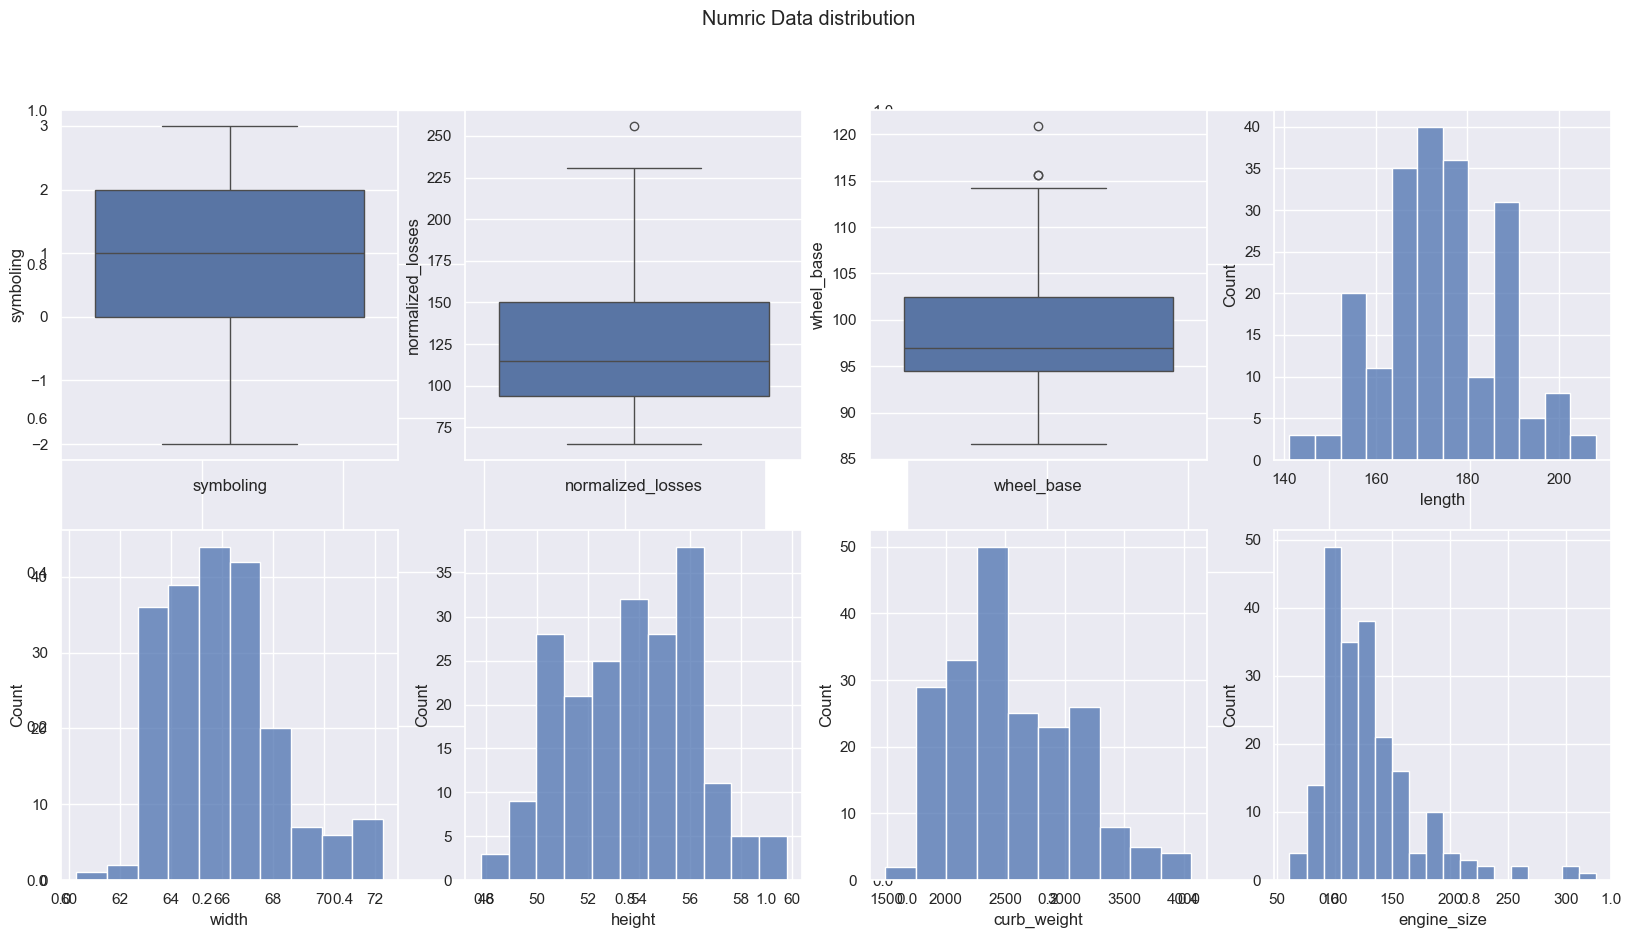

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Numric Data distribution ");

plt.subplot(241)
sns.boxplot(numerical_features["symboling"])
plt.xlabel("symboling");

plt.subplot(242)
sns.boxplot(numerical_features["normalized_losses"])
plt.xlabel("normalized_losses");

plt.subplot(243)
sns.boxplot(numerical_features["wheel_base"])
plt.xlabel("wheel_base");


plt.subplot(244)
sns.histplot(numerical_features["length"])
plt.xlabel("length");

plt.subplot(245)
sns.histplot(numerical_features["width"],bins=10)
plt.xlabel("width");

plt.subplot(246)
sns.histplot(numerical_features["height"])
plt.xlabel("height");

plt.subplot(247)
sns.histplot(numerical_features["curb_weight"])
plt.xlabel("curb_weight");

plt.subplot(248)
sns.histplot(numerical_features["engine_size"])
plt.xlabel("engine_size");



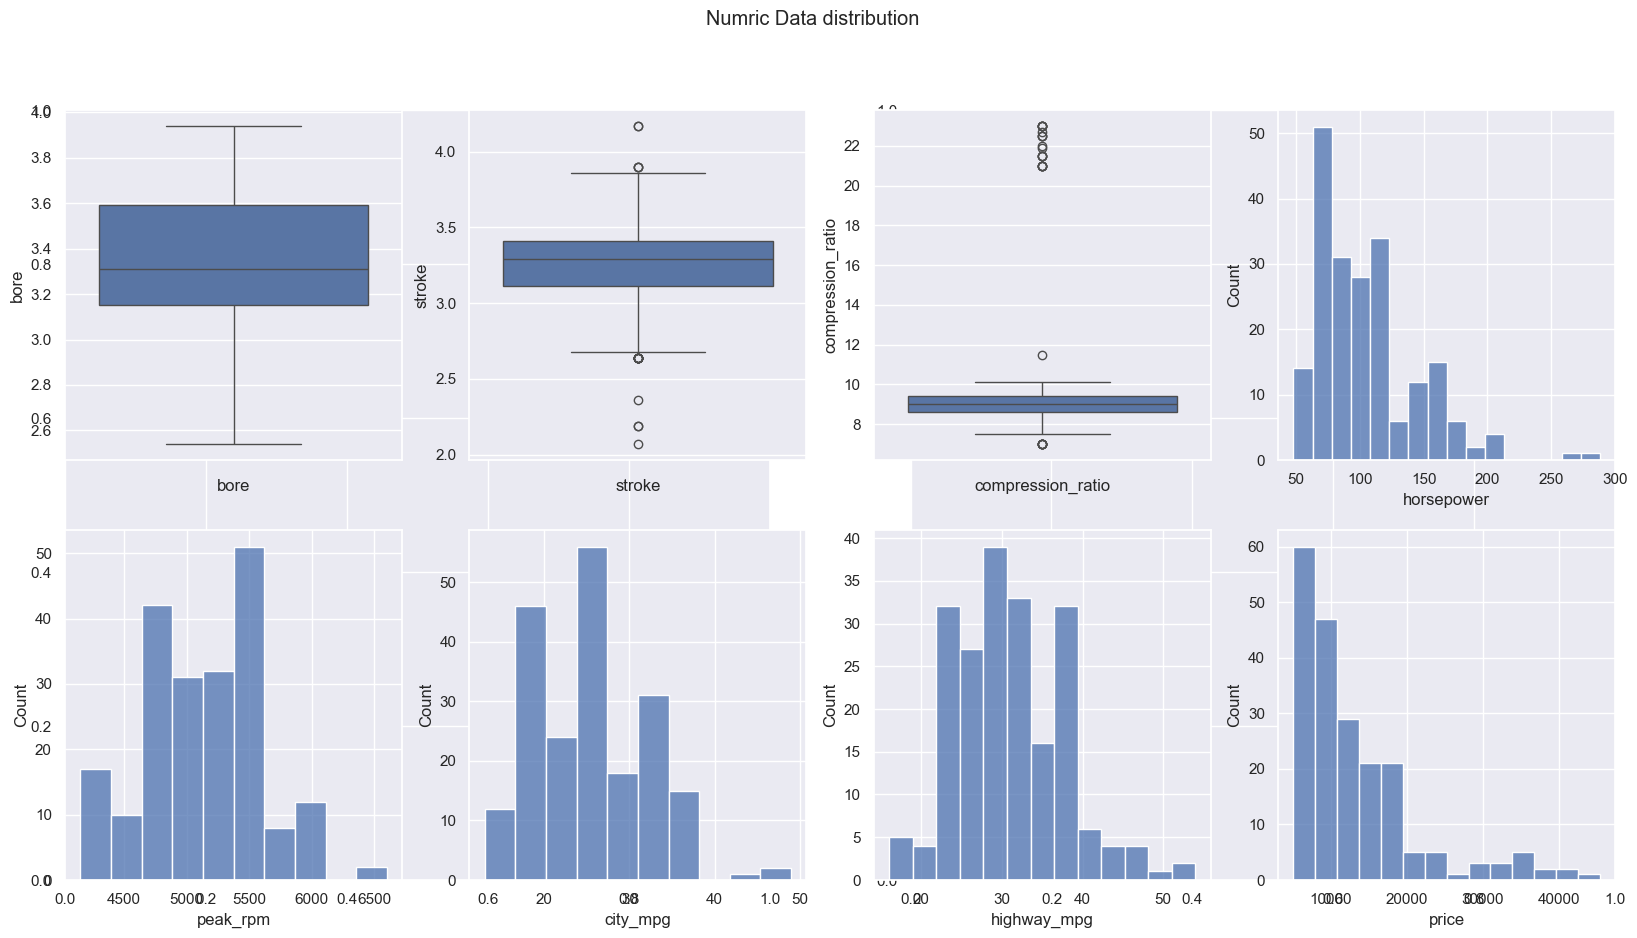

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Numric Data distribution ");

plt.subplot(241)
sns.boxplot(numerical_features["bore"])
plt.xlabel("bore");

plt.subplot(242)
sns.boxplot(numerical_features["stroke"])
plt.xlabel("stroke");

plt.subplot(243)
sns.boxplot(numerical_features["compression_ratio"])
plt.xlabel("compression_ratio");


plt.subplot(244)
sns.histplot(numerical_features["horsepower"])
plt.xlabel("horsepower");

plt.subplot(245)
sns.histplot(numerical_features["peak_rpm"],bins=10)
plt.xlabel("peak_rpm");

plt.subplot(246)
sns.histplot(numerical_features["city_mpg"])
plt.xlabel("city_mpg");

plt.subplot(247)
sns.histplot(numerical_features["highway_mpg"])
plt.xlabel("highway_mpg");

plt.subplot(248)
sns.histplot(numerical_features["price"])
plt.xlabel("price");


*Categorical features Visualization :*

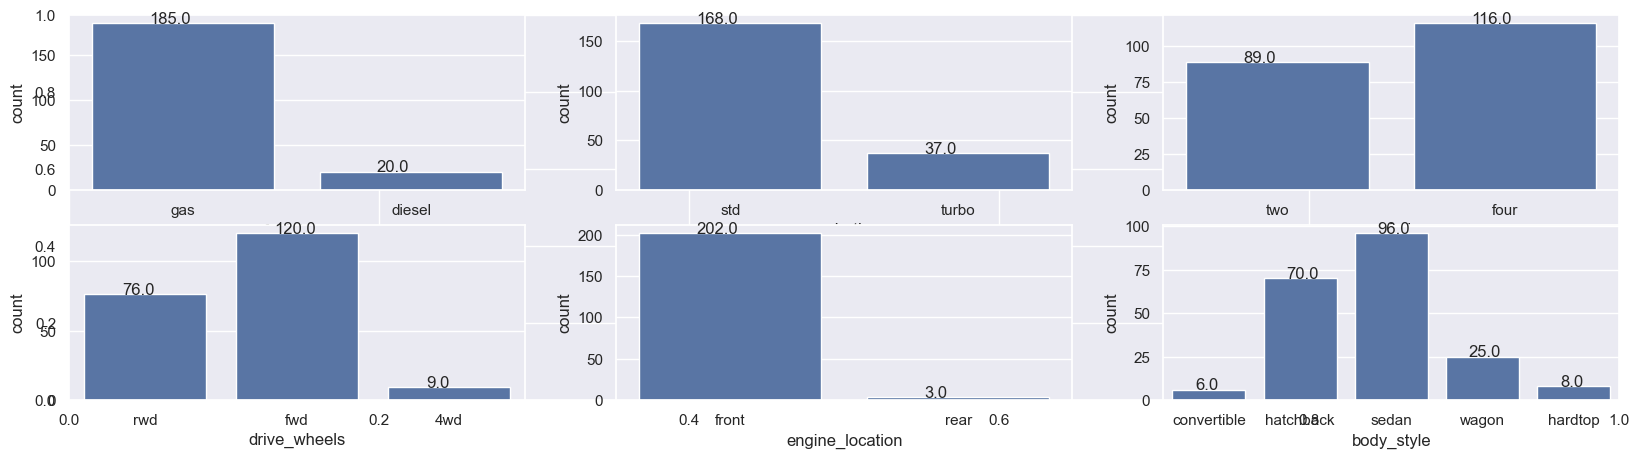

In [16]:
plt.subplots(figsize=(20,5))

plt.subplot(231)
ax=sns.countplot(data=categorical_features,x="fuel_type")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
         
plt.subplot(232)
ax=sns.countplot(data=categorical_features,x="aspiration")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

plt.subplot(233)
ax=sns.countplot(data=categorical_features,x="num_of_doors")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

plt.subplot(234)
ax=sns.countplot(data=categorical_features,x="drive_wheels")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01)) 

plt.subplot(235)
ax=sns.countplot(data=categorical_features,x="engine_location")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

plt.subplot(236)
ax=sns.countplot(data=categorical_features,x="body_style")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))            

In [17]:
categorical_features.columns

Index(['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
       'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders',
       'fuel_system'],
      dtype='object')

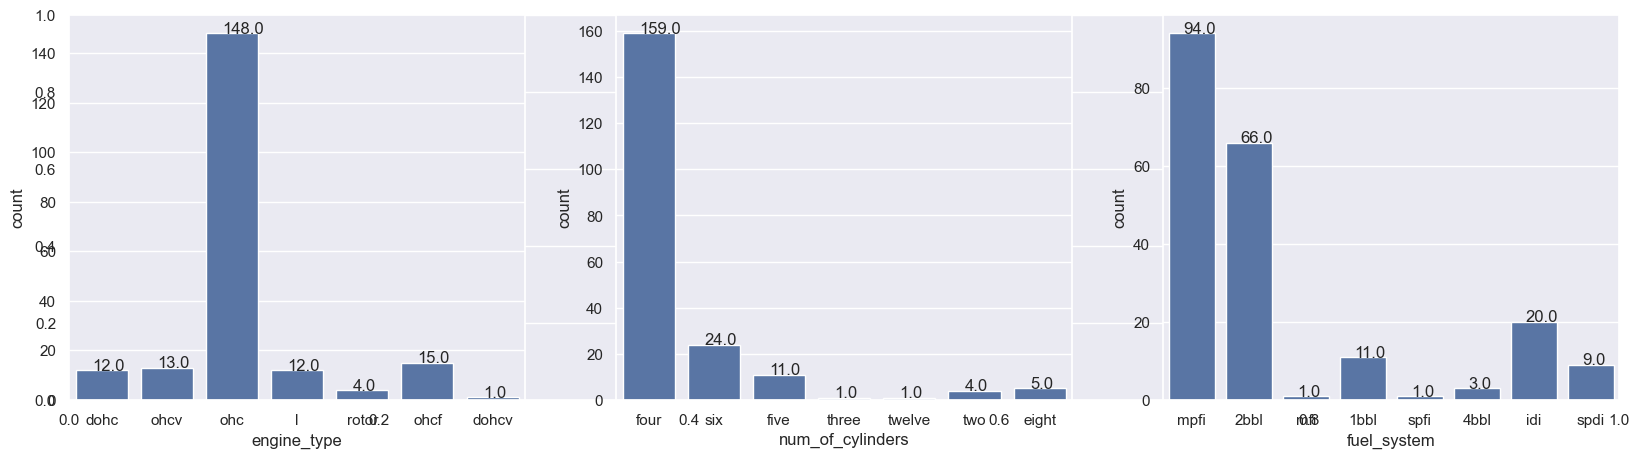

In [18]:
plt.subplots(figsize=(20,5))

plt.subplot(131)
ax=sns.countplot(data=categorical_features,x="engine_type")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
         
plt.subplot(132)
ax=sns.countplot(data=categorical_features,x="num_of_cylinders")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

plt.subplot(133)
ax=sns.countplot(data=categorical_features,x="fuel_system")
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))  

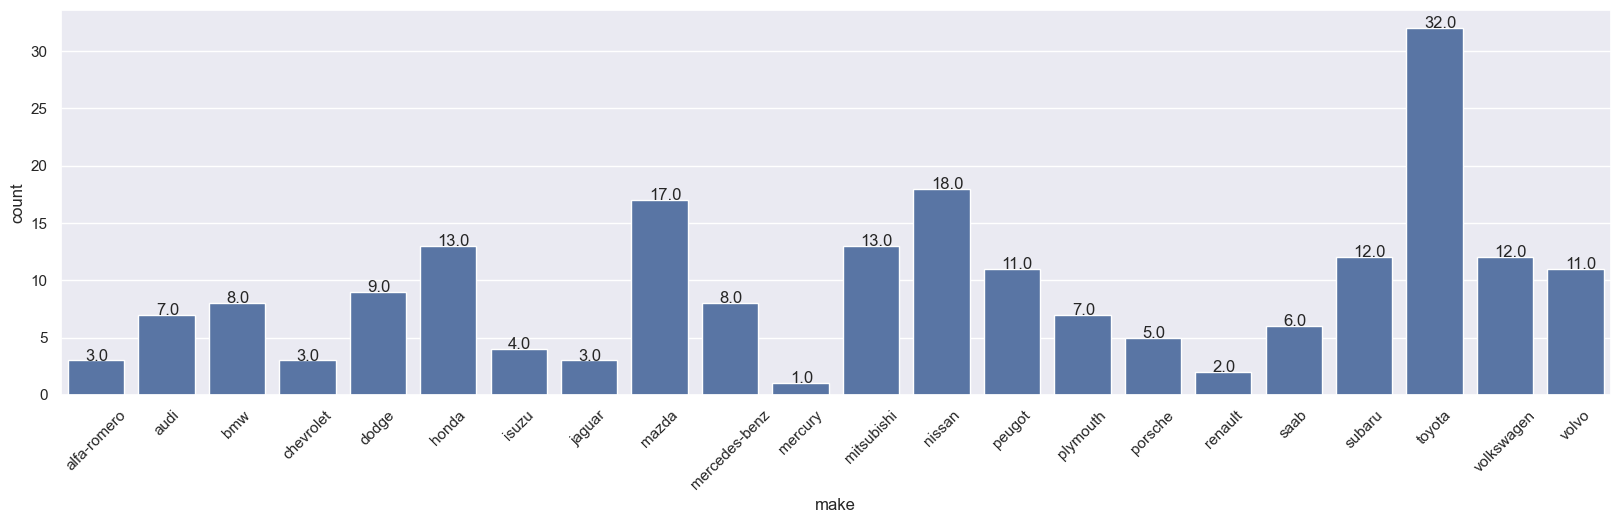

In [19]:
plt.subplots(figsize=(20,5))

ax=sns.countplot(data=categorical_features,x="make")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
for p in ax.patches:
         ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

*C. EDA Correlation*

In [22]:
#import klib
#klib.corr_interactive_plot(df,figsize=(10,5))

In [23]:
numerical_features.corr()["price"]

symboling           -0.084590
normalized_losses    0.093261
wheel_base           0.576558
length               0.670816
width                0.709573
height               0.135036
curb_weight          0.804128
engine_size          0.847934
bore                 0.516845
stroke               0.077449
compression_ratio    0.071774
horsepower           0.731286
peak_rpm            -0.101256
city_mpg            -0.647395
highway_mpg         -0.673891
price                1.000000
Name: price, dtype: float64

<Axes: >

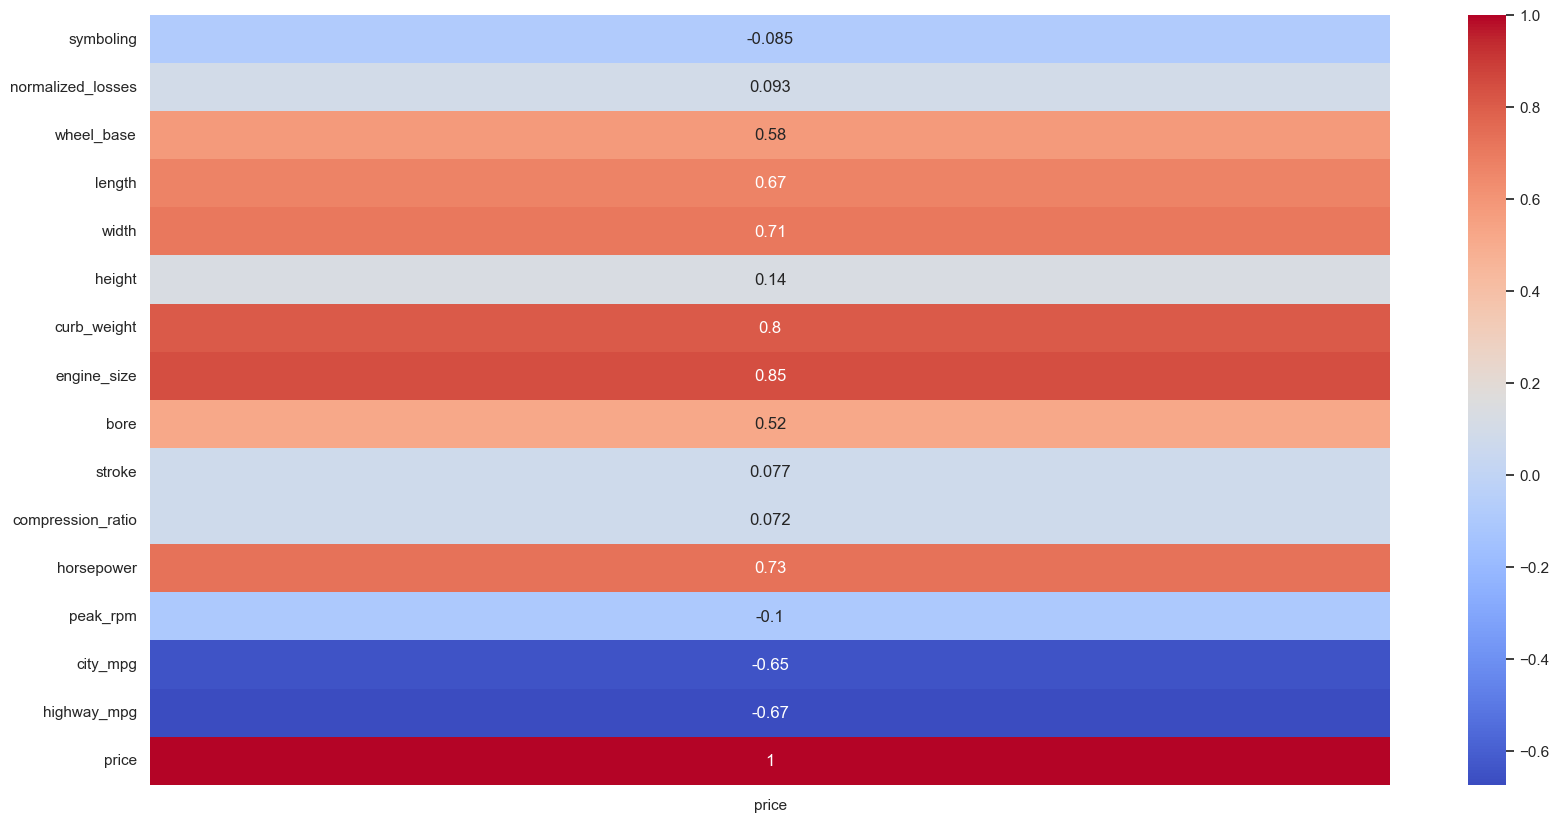

In [24]:
sns.heatmap((numerical_features.corr()["price"]).to_frame(),annot=True,cmap='coolwarm')

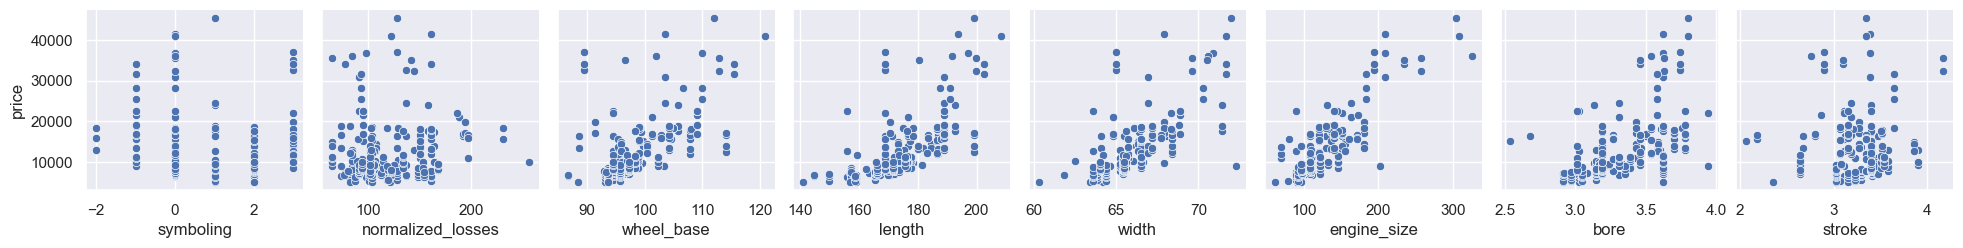

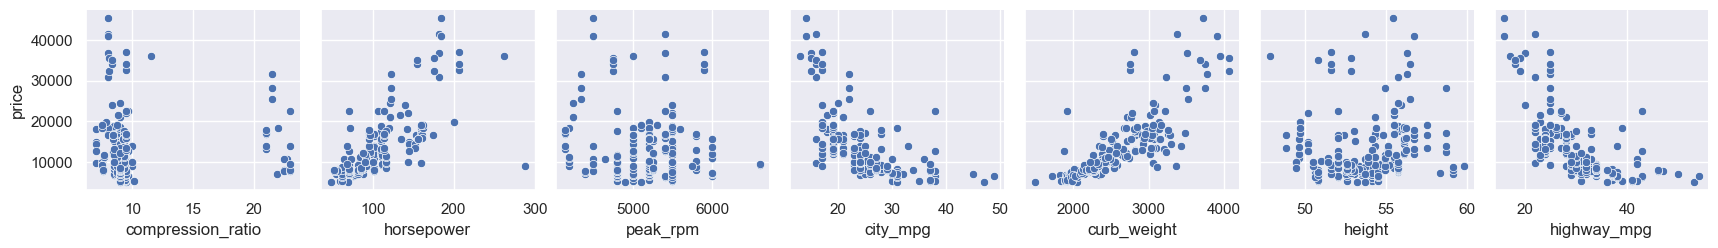

In [25]:
sns.pairplot(data=numerical_features,
             x_vars=['symboling', 'normalized_losses', 'wheel_base', 'length', 'width','engine_size', 'bore', 'stroke'],
             y_vars='price');

sns.pairplot(data=numerical_features,
             x_vars=['compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg','curb_weight','height','highway_mpg'],
             y_vars='price');

---

## *Data Modelling*

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error,accuracy_score,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
from tqdm import tqdm

*Date preprocessing*

In [27]:
categories_encoder=LabelEncoder()

In [28]:
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])
        

In [29]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,150,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,137,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,104,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


*Define x and y*

In [30]:
x=df.drop(["price"],axis=1)
y=df["price"]

*Splitting data into training and testing subsets*

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.20)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (164, 25) and Y = (164,) : 
Test data shape of X = (41, 25) and Y = (41,) : 


*Data Scaling*

In [32]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [63]:
models = {
                "RandomForestRegressor": RandomForestRegressor(),
                "DecisionTreeRegressor": DecisionTreeRegressor(),
                "LinearRegression": LinearRegression(),
                "XGBRFRegressor": XGBRFRegressor(),
                "GradientBoostingRegressor":GradientBoostingRegressor(),
                "AdaBoostRegressor": AdaBoostRegressor(),
                "BaggingRegressor":BaggingRegressor()
                
                
            }

params={        
                "RandomForestRegressor":{
                    "n_estimators":[90,100,110], 
                    "min_samples_split":[2,4,6],
                    "min_samples_leaf":[0.8,1],
                    "bootstrap":[True, False],                                                                                                    
                    "max_features":["sqrt","log2","auto"],                                     
                    "max_depth":[2,3,4],
                    "criterion":['poisson', 'squared_error','friedman_mse','absolute_error']
                    },

                "DecisionTreeRegressor": {
                    'criterion':['poisson', 'squared_error','friedman_mse','absolute_error'],
                    'splitter': ['best', 'random'],
                    "max_depth":[2,3,4], 
                    "min_samples_split":[2,4,6],
                    "min_samples_leaf":[0.5,0.8],
                    #'max_features': [1,2,3,4],
                },
                "LinearRegression":{

                },
                "XGBRFRegressor":{
                    'learning_rate': [0.001,0.1,1],
                    'n_estimators': [90, 100, 110], 
                    "booster":["gbtree"],
                    'colsample_bytree': [0.5,0.8], 
                    'colsample_bynode': [0.5,0.8],
                    'random_state':[42]
                },

                
                "GradientBoostingRegressor":{
                    #'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                    'learning_rate': [0.01,0.1,1],
                    'n_estimators': [90, 100, 110],
                    'subsample': [0.8,1],
                    #'criterion':['squared_error', 'friedman_mse'],
                    'min_samples_split': [2, 4, 6],
                    'min_samples_leaf': [0.8, 1],
                    'max_depth':[2,3,4],
                    #'max_features': ['sqrt', 'log2', 'auto']
                },
                "AdaBoostRegressor":{
                    'n_estimators': [45,50,55],
                    'learning_rate': [0.0001,0.001,0.01],
                    'loss':['linear','square','exponential'],
                    #'random_state':[42]
                    
                },
                "BaggingRegressor":{},
                
            }

In [35]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_prediction=model.predict(x_train)
    y_test_prediction=model.predict(x_test)

    model_train_mean_absolute_percentage_error=mean_absolute_percentage_error(y_train,y_train_prediction)
    model_test_mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_test_prediction)

    model_train_r2_score=r2_score(y_train,y_train_prediction)
    model_test_r2_score=r2_score(y_test,y_test_prediction)

    print(list(models.keys())[i])

    print("Model Performance for Train Data")
    print("mean_absolute_percentage_error : {:.4f}".format(model_train_mean_absolute_percentage_error))
    print("model_train_r2_score : {:.4f}".format(model_train_r2_score))

    print("------------------------------------------------------")

    print("Model Performance for test Data")
    print("model_test_mean_absolute_percentage_error : {:.4f}".format(model_test_mean_absolute_percentage_error))
    print("model_test_r2_score : {:.4f}".format(model_test_r2_score))


    print("="*35)
    print("\n")

RandomForestRegressor
Model Performance for Train Data
mean_absolute_percentage_error : 0.0615
model_train_r2_score : 0.9697
------------------------------------------------------
Model Performance for test Data
model_test_mean_absolute_percentage_error : 0.1102
model_test_r2_score : 0.9364


DecisionTreeRegressor
Model Performance for Train Data
mean_absolute_percentage_error : 0.0026
model_train_r2_score : 0.9996
------------------------------------------------------
Model Performance for test Data
model_test_mean_absolute_percentage_error : 0.1710
model_test_r2_score : 0.6369


LinearRegression
Model Performance for Train Data
mean_absolute_percentage_error : 0.1719
model_train_r2_score : 0.8468
------------------------------------------------------
Model Performance for test Data
model_test_mean_absolute_percentage_error : 0.1845
model_test_r2_score : 0.8398


XGBRFRegressor
Model Performance for Train Data
mean_absolute_percentage_error : 0.0657
model_train_r2_score : 0.9771
-----

In [36]:
report = {}
report2={}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_prediction=model.predict(x_train)
    y_test_prediction=model.predict(x_test)

    model_train_mean_absolute_percentage_error=mean_absolute_percentage_error(y_train,y_train_prediction)
    model_test_mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_test_prediction)

    model_train_r2_score=r2_score(y_train,y_train_prediction)
    model_test_r2_score=r2_score(y_test,y_test_prediction)

    report[list(models.keys())[i]] = model_train_mean_absolute_percentage_error
    report2[list(models.keys())[i]] = model_test_mean_absolute_percentage_error

train_report=pd.DataFrame(report,index=report.keys()).iloc[0].reset_index().rename(columns={"index":"model","RandomForestRegressor":"model_train_mean_absolute_percentage_error"})    
test_report=pd.DataFrame(report2,index=report.keys()).iloc[0].reset_index().rename(columns={"index":"model","RandomForestRegressor":"model_test_mean_absolute_percentage_error"})
final_report=pd.concat([train_report,test_report["model_test_mean_absolute_percentage_error"]],axis=1)


In [37]:
final_report

,model,model_train_mean_absolute_percentage_error,model_test_mean_absolute_percentage_error
0,RandomForestRegressor,0.056744,0.118406
1,DecisionTreeRegressor,0.002623,0.145222
2,LinearRegression,0.171856,0.184483
3,XGBRFRegressor,0.065665,0.129316
4,GradientBoostingRegressor,0.044639,0.117731
5,AdaBoostRegressor,0.207249,0.250836
6,BaggingRegressor,0.074214,0.131923


In [38]:
best_model_score = min(sorted(final_report["model_test_mean_absolute_percentage_error"]))
best_model_score

0.11773145038682055

In [39]:
best_model_name = list(final_report["model"])[
                list(final_report["model_test_mean_absolute_percentage_error"]).index(best_model_score)]
best_model_name

'GradientBoostingRegressor'

In [40]:
model=GradientBoostingRegressor().fit(x_train,y_train)

In [41]:
predicted=model.predict(x_test)

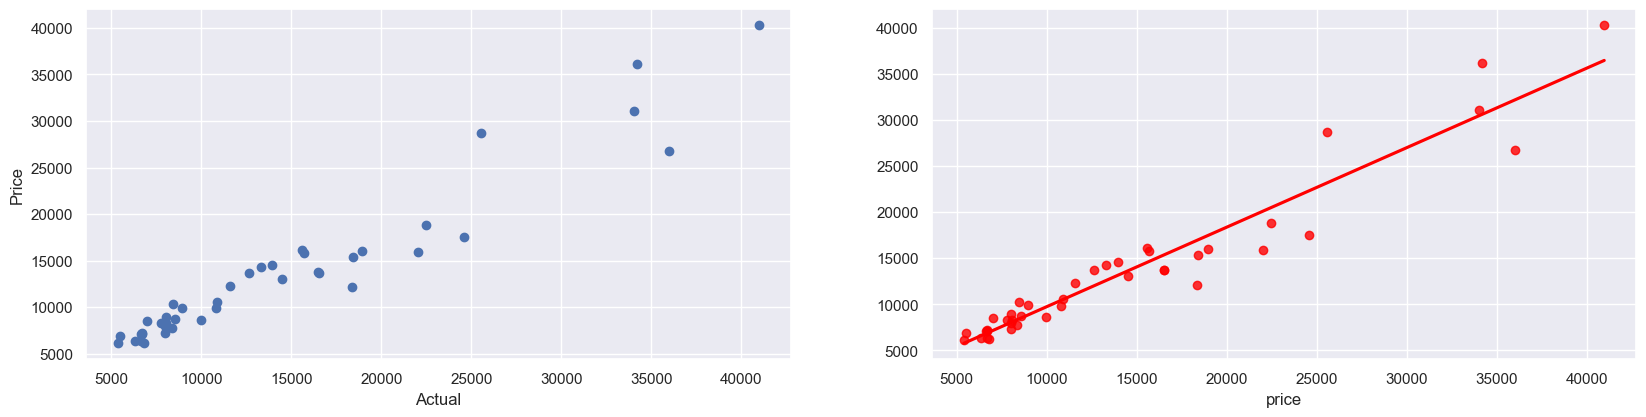

In [42]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('Price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');

* *applying randomsearch hyperparameter tuning*

In [61]:
def evaluate_models(x_train,y_train,x_test,y_test,models,params):            
                report = {}
                #report2={}
                for i in tqdm(range(len(list(models)))):
                    model=list(models.values())[i]
                    para=params[list(models.keys())[i]]

                    RandomSearchCV=RandomizedSearchCV(model,param_distributions= para,cv=3)
                    RandomSearchCV.fit(x_train,y_train)

                    model.set_params(**RandomSearchCV.best_params_)
                    model.fit(x_train,y_train)

                    y_train_prediction=model.predict(x_train)
                    y_test_prediction=model.predict(x_test)

                    model_train_mean_absolute_percentage_error=mean_absolute_percentage_error(y_train,y_train_prediction)
                    model_test_mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_test_prediction)

                    model_train_r2_score=r2_score(y_train,y_train_prediction)
                    model_test_r2_score=r2_score(y_test,y_test_prediction)

                    #report[list(models.keys())[i]] = model_train_mean_absolute_percentage_error
                    report[list(models.keys())[i]] = (model_train_mean_absolute_percentage_error,model_test_mean_absolute_percentage_error,model_train_r2_score,model_test_r2_score,
                                                      RandomSearchCV.best_params_)


                return report

In [64]:
model_report:dict=evaluate_models(x_train, y_train, x_test, y_test,models=models,params=params)

100%|██████████| 7/7 [00:10<00:00,  1.45s/it]


In [65]:
model_report

{'RandomForestRegressor': (0.11877353174386134,
  0.13746416812737192,
  0.8708586366644818,
  0.8983197887542254,
  {'n_estimators': 90,
   'min_samples_split': 4,
   'min_samples_leaf': 1,
   'max_features': 'sqrt',
   'max_depth': 3,
   'criterion': 'absolute_error',
   'bootstrap': False}),
 'DecisionTreeRegressor': (0.2714958424549816,
  0.28048483203390795,
  0.3743122881051022,
  0.41262139283439736,
  {'splitter': 'best',
   'min_samples_split': 2,
   'min_samples_leaf': 0.5,
   'max_depth': 4,
   'criterion': 'squared_error'}),
 'LinearRegression': (0.17185599599668136,
  0.18448311447618457,
  0.8467973888215193,
  0.8398052263666916,
  {}),
 'XGBRFRegressor': (0.07522424808632461,
  0.1085891941017759,
  0.9672381372065504,
  0.949469648395215,
  {'random_state': 42,
   'n_estimators': 90,
   'learning_rate': 1,
   'colsample_bytree': 0.5,
   'colsample_bynode': 0.5,
   'booster': 'gbtree'}),
 'GradientBoostingRegressor': (0.032512378847739956,
  0.11558894681037939,
  0.996

In [66]:
model_report_df=pd.DataFrame(model_report).iloc[:-1] 

In [67]:
model_report_df

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,XGBRFRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
0,0.118774,0.271496,0.171856,0.075224,0.032512,0.126407,0.068235
1,0.137464,0.280485,0.184483,0.108589,0.115589,0.152262,0.119364
2,0.870859,0.374312,0.846797,0.967238,0.996657,0.903819,0.953689
3,0.89832,0.412621,0.839805,0.94947,0.914963,0.900183,0.932766


In [68]:
model_report_df["metrices"]=["model_train_mean_absolute_percentage_error","model_test_mean_absolute_percentage_error","model_train_r2_score","model_test_r2_score"]

In [69]:
model_report_df

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,XGBRFRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,metrices
0,0.118774,0.271496,0.171856,0.075224,0.032512,0.126407,0.068235,model_train_mean_absolute_percentage_error
1,0.137464,0.280485,0.184483,0.108589,0.115589,0.152262,0.119364,model_test_mean_absolute_percentage_error
2,0.870859,0.374312,0.846797,0.967238,0.996657,0.903819,0.953689,model_train_r2_score
3,0.89832,0.412621,0.839805,0.94947,0.914963,0.900183,0.932766,model_test_r2_score


In [70]:
BaggingRegressor_best_paramerts=[k[4] for i,k in model_report.items() if i=="BaggingRegressor"]
BaggingRegressor_best_paramerts

[{}]

In [71]:
model=GradientBoostingRegressor(
   ).fit(x_train,y_train)

In [72]:
predicted=model.predict(x_test)

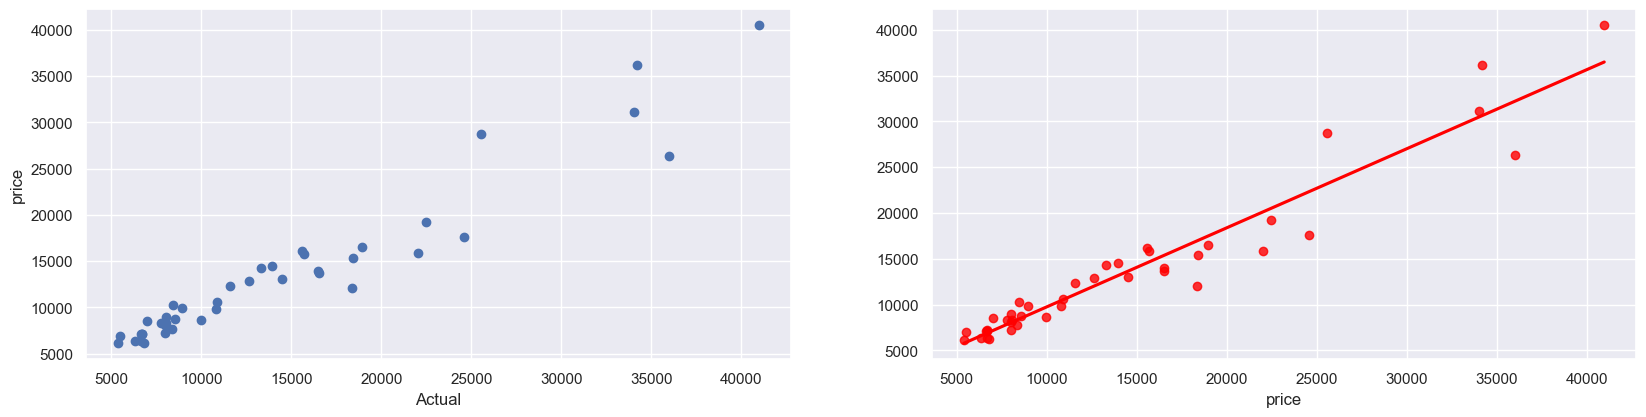

In [73]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');